In [1]:
!pip install gensim

In [2]:
!pip install pyldavis

In [29]:
!pip install wordcloud

C:\Users\sahay\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import matplotlib.pyplot as plt

import re

C:\Users\sahay\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data=pd.read_csv('papers.csv')
data.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [5]:
def prepare_data(df):
    data=df['paper_text']
    useless_words=list(stopwords.words('english')+list(punctuation))
    
    lemmatizer=WordNetLemmatizer()
    corpus=data.tolist()
    final_corpus=[]
    
    for i in range(len(corpus)):
        word=word_tokenize(corpus[i].lower())
        word=[
            lemmatizer.lemmatize(y) for y in word if y not in useless_words
        ]
        j=" ".join(word)
        j=re.sub(r'[^\w\s]', " ", j)
        j=re.sub("(^|\W)\d+"," ",j)
        
        final_corpus.append(j)
    
    return final_corpus

In [6]:
final_corpus=prepare_data(data)

id_=data['id']
train_df={
    'id':id_,
    'content':final_corpus,
}

train_df=pd.DataFrame(train_df)
train_df.head()

,id,content
0,1,self organization associative database appli...
1,10,mean field theory layer iv visual cortex app...
2,100,storing covariance associative long term pot...
3,1000,bayesian query construction neural network mod...
4,1001,neural network ensemble cross validation activ...


In [7]:
final_data=train_df['content'].map(word_tokenize)

In [8]:
final_data[:10]

0    [self, organization, associative, database, ap...
1    [mean, field, theory, layer, iv, visual, corte...
2    [storing, covariance, associative, long, term,...
3    [bayesian, query, construction, neural, networ...
4    [neural, network, ensemble, cross, validation,...
5    [u, sing, neural, net, instantiate, deformable...
6    [plasticity, mediated, competitive, learning, ...
7    [iceg, morphology, classification, using, anal...
8    [real, time, control, tokamak, plasma, using, ...
9    [real, time, control, tokamak, plasma, using, ...
Name: content, dtype: object

In [26]:
# eda

C:\Users\sahay\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
s=','
for i in train_df['content']:
    s+=i


C:\Users\sahay\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\sahay\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


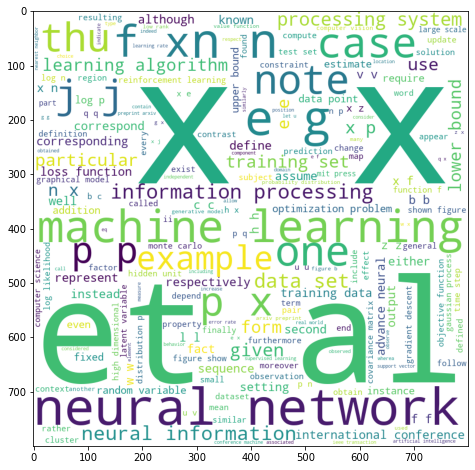

In [57]:
from wordcloud import WordCloud

wordcloud=WordCloud(background_color='white',
                    random_state=101,
                   width=800,
                   height=800).generate(s)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.show()

In [54]:
s1=','
for i in data['title']:
    s1+=i



C:\Users\sahay\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\sahay\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


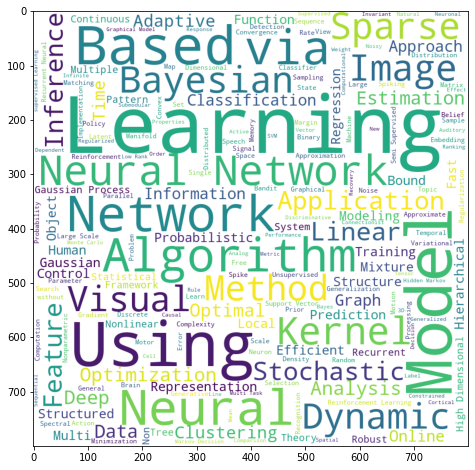

In [55]:
from wordcloud import WordCloud

wordcloud=WordCloud(background_color='white',
                    random_state=101,
                   width=800,
                   height=800).generate(s1)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.show()

In [9]:
dictionary = gensim.corpora.Dictionary(final_data)

In [10]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 _l
1 a
2 abolish
3 abstract
4 accelerate
5 acceptable
6 accomplishes
7 accordingly
8 achieve
9 achieved
10 actual


In [11]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [12]:
bow_corpus = [dictionary.doc2bow(doc) for doc in final_data]

In [13]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [14]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [15]:
for index, score in sorted(lda_model_tfidf[bow_corpus[2]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.6280035376548767	 
Topic: 0.002*"policy" + 0.002*"spike" + 0.002*"regret" + 0.002*"neuron" + 0.002*"kernel" + 0.002*"action" + 0.002*"image" + 0.001*"reward" + 0.001*"xt" + 0.001*"object"

Score: 0.36765575408935547	 
Topic: 0.002*"image" + 0.002*"neuron" + 0.001*"stimulus" + 0.001*"motion" + 0.001*"layer" + 0.001*"policy" + 0.001*"object" + 0.001*"kernel" + 0.001*"visual" + 0.001*"cell"


In [25]:
import pyLDAvis
import pyLDAvis.gensim_models 

pyLDAvis.enable_notebook()


pyLDAvis.gensim_models.prepare(lda_model_tfidf, corpus_tfidf, dictionary)

C:\Users\sahay\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.011648 -0.012238       1        1  24.213381
6      0.012334 -0.000742       2        1  23.282372
0      0.009828  0.009257       3        1  22.978334
8      0.002465  0.010715       4        1  15.988061
2      0.004352  0.002554       5        1   5.305525
3     -0.003783 -0.000205       6        1   2.090179
9     -0.006673 -0.009076       7        1   1.674207
7     -0.011240  0.007801       8        1   1.663962
4     -0.005454 -0.007372       9        1   1.595266
5     -0.013476 -0.000693      10        1   1.208714, topic_info=                Term        Freq       Total Category  logprob  loglift
795           neuron  113.000000  113.000000  Default  30.0000  30.0000
4466          policy   97.000000   97.000000  Default  29.0000  29.0000
263            image  134.000000  134.000000  Default  28.0000  28.0000
3671          kernel  122.000000  122.000000  Default  27.0000  27.0000
356             node   88.000000   88.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
2080         cluster    0.669764   76.080656  Topic10  -7.2765  -0.3170
319             loss    0.633804   61.109911  Topic10  -7.3317  -0.1531
594               xi    0.651086   77.787459  Topic10  -7.3048  -0.3675
643             cell    0.638814   67.856459  Topic10  -7.3238  -0.2499
1554  classification    0.624432   55.800948  Topic10  -7.3466  -0.0771

[808 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
8587       4  0.546637    abel
924        1  0.142410  action
924        2  0.227856  action
924        3  0.199374  action
924        4  0.299061  action
...      ...       ...     ...
600        6  0.019718      yi
600        7  0.019718      yi
600        8  0.019718      yi
600        9  0.019718      yi
11332      2  0.831649     yik

[1725 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 1, 9, 3, 4, 10, 8, 5, 6])